In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255.0
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [10]:
def create_model():
  model = models.Sequential([
      layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1)),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(64,(3,3), activation = 'relu'),
      layers.MaxPooling2D((2,2)),

      layers.Flatten(),
      layers.Dense(64, activation = 'relu'),
      layers.Dropout(0.5),
      layers.Dense(10,activation = 'softmax')

  ])
  return model

In [11]:
model = create_model()
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
histories = model.fit(x_train,y_train,
                      epochs = 10, batch_size = 32,
                      validation_split = 0.2, verbose = 1)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8025 - loss: 0.6113 - val_accuracy: 0.9784 - val_loss: 0.0691
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9558 - loss: 0.1546 - val_accuracy: 0.9848 - val_loss: 0.0517
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9664 - loss: 0.1094 - val_accuracy: 0.9853 - val_loss: 0.0464
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9749 - loss: 0.0821 - val_accuracy: 0.9897 - val_loss: 0.0364
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9786 - loss: 0.0717 - val_accuracy: 0.9902 - val_loss: 0.0360
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9809 - loss: 0.0605 - val_accuracy: 0.9906 - val_loss: 0.0374
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9833 - loss: 0.0522 - val_accuracy: 0.9902 - val_loss: 0.0412
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9853 - loss: 0.0454 

In [13]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print(f"Training Accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9894 - loss: 0.0328
Training Accuracy: 99.20%


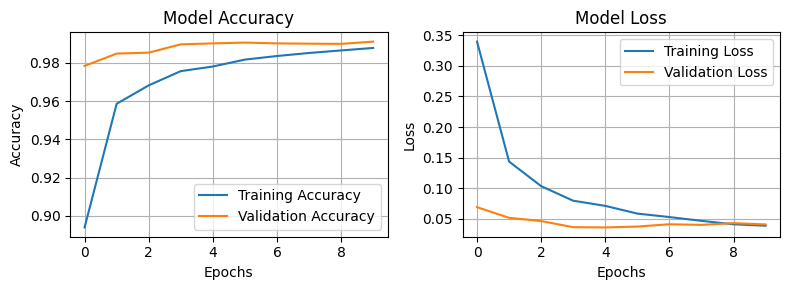

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
plt.plot(histories.history['accuracy'],label = 'Training Accuracy')
plt.plot(histories.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(histories.history['loss'],label = 'Training Loss')
plt.plot(histories.history['val_loss'],label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()
plt.grid(True)
plt.legend()

plt.show()


In [29]:
predictions = model.predict(x_test[:10])
def display_predictions(images, predictions, labels):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predictions[i].argmax()} True: {labels[i].argmax()}")
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


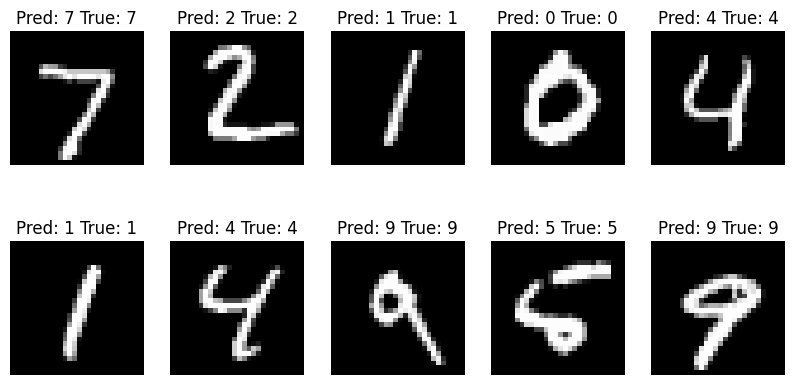

In [30]:
display_predictions(x_test[:10],predictions,y_test[:10])